In [2]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

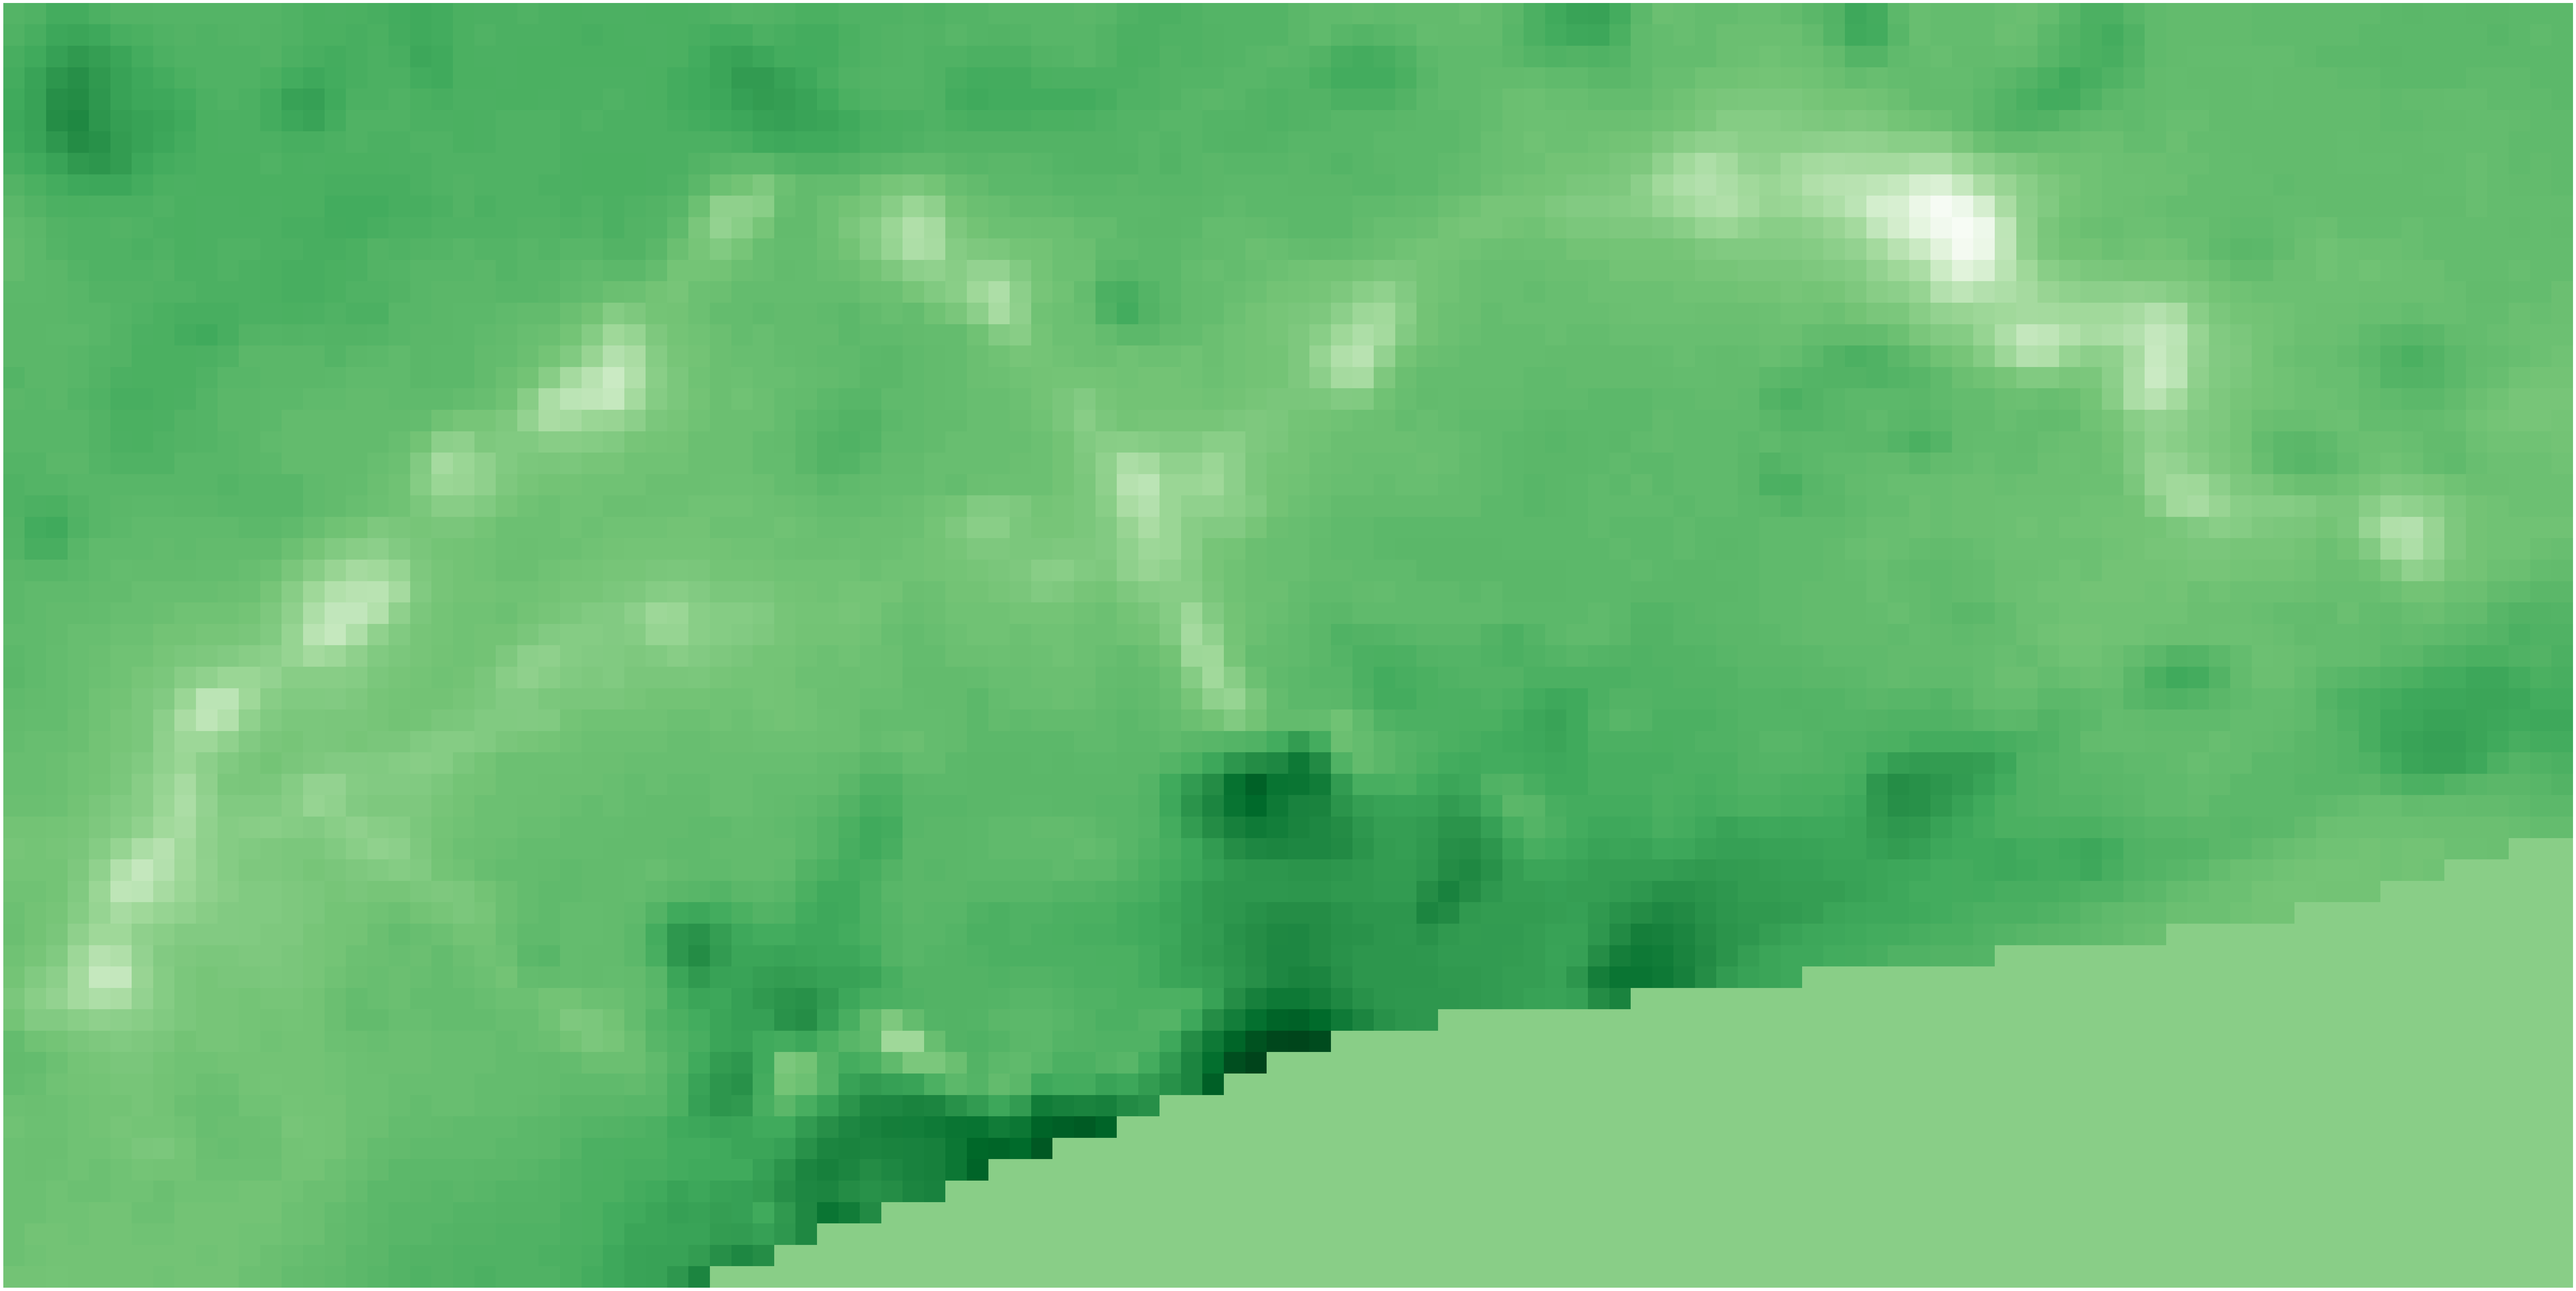

In [23]:
input_image_path = "/Users/ponywen/projects/ienf_q/pre_processing/Centered/processed_S163-2_a.tif"
input_image = Image.open(input_image_path)
lab_image = cv2.cvtColor(np.array(input_image), cv2.COLOR_BGR2Lab)

plt.figure(figsize=(100, 100))
# plt.subplot(1, 3, 1)
# plt.title('L channel')
# plt.imshow(lab_image[:,:,0], cmap='gray')  # L channel

# plt.subplot(1, 3, 2)
# plt.title('a channel')
# plt.imshow(lab_image[:,:,1], cmap='gray')  # a channel

# plt.subplot(1, 3, 3)
# plt.title('b channel')
# plt.imshow(lab_image[:,:,2], cmap='gray')  # b channel

# 印出a 通道中 > 0 的像素數量

# 反轉 a 通道，並且將 < 0 的值設為 0
lab_image[:,:,1] =  255 - lab_image[:,:,1]

# lab_image[:,:,1][lab_image[:,:,1] < 64] = 0

plt.imshow(lab_image[805:865,865:985,1], cmap='Greens_r')  # Combined Lab image
plt.axis('off')	
plt.show()


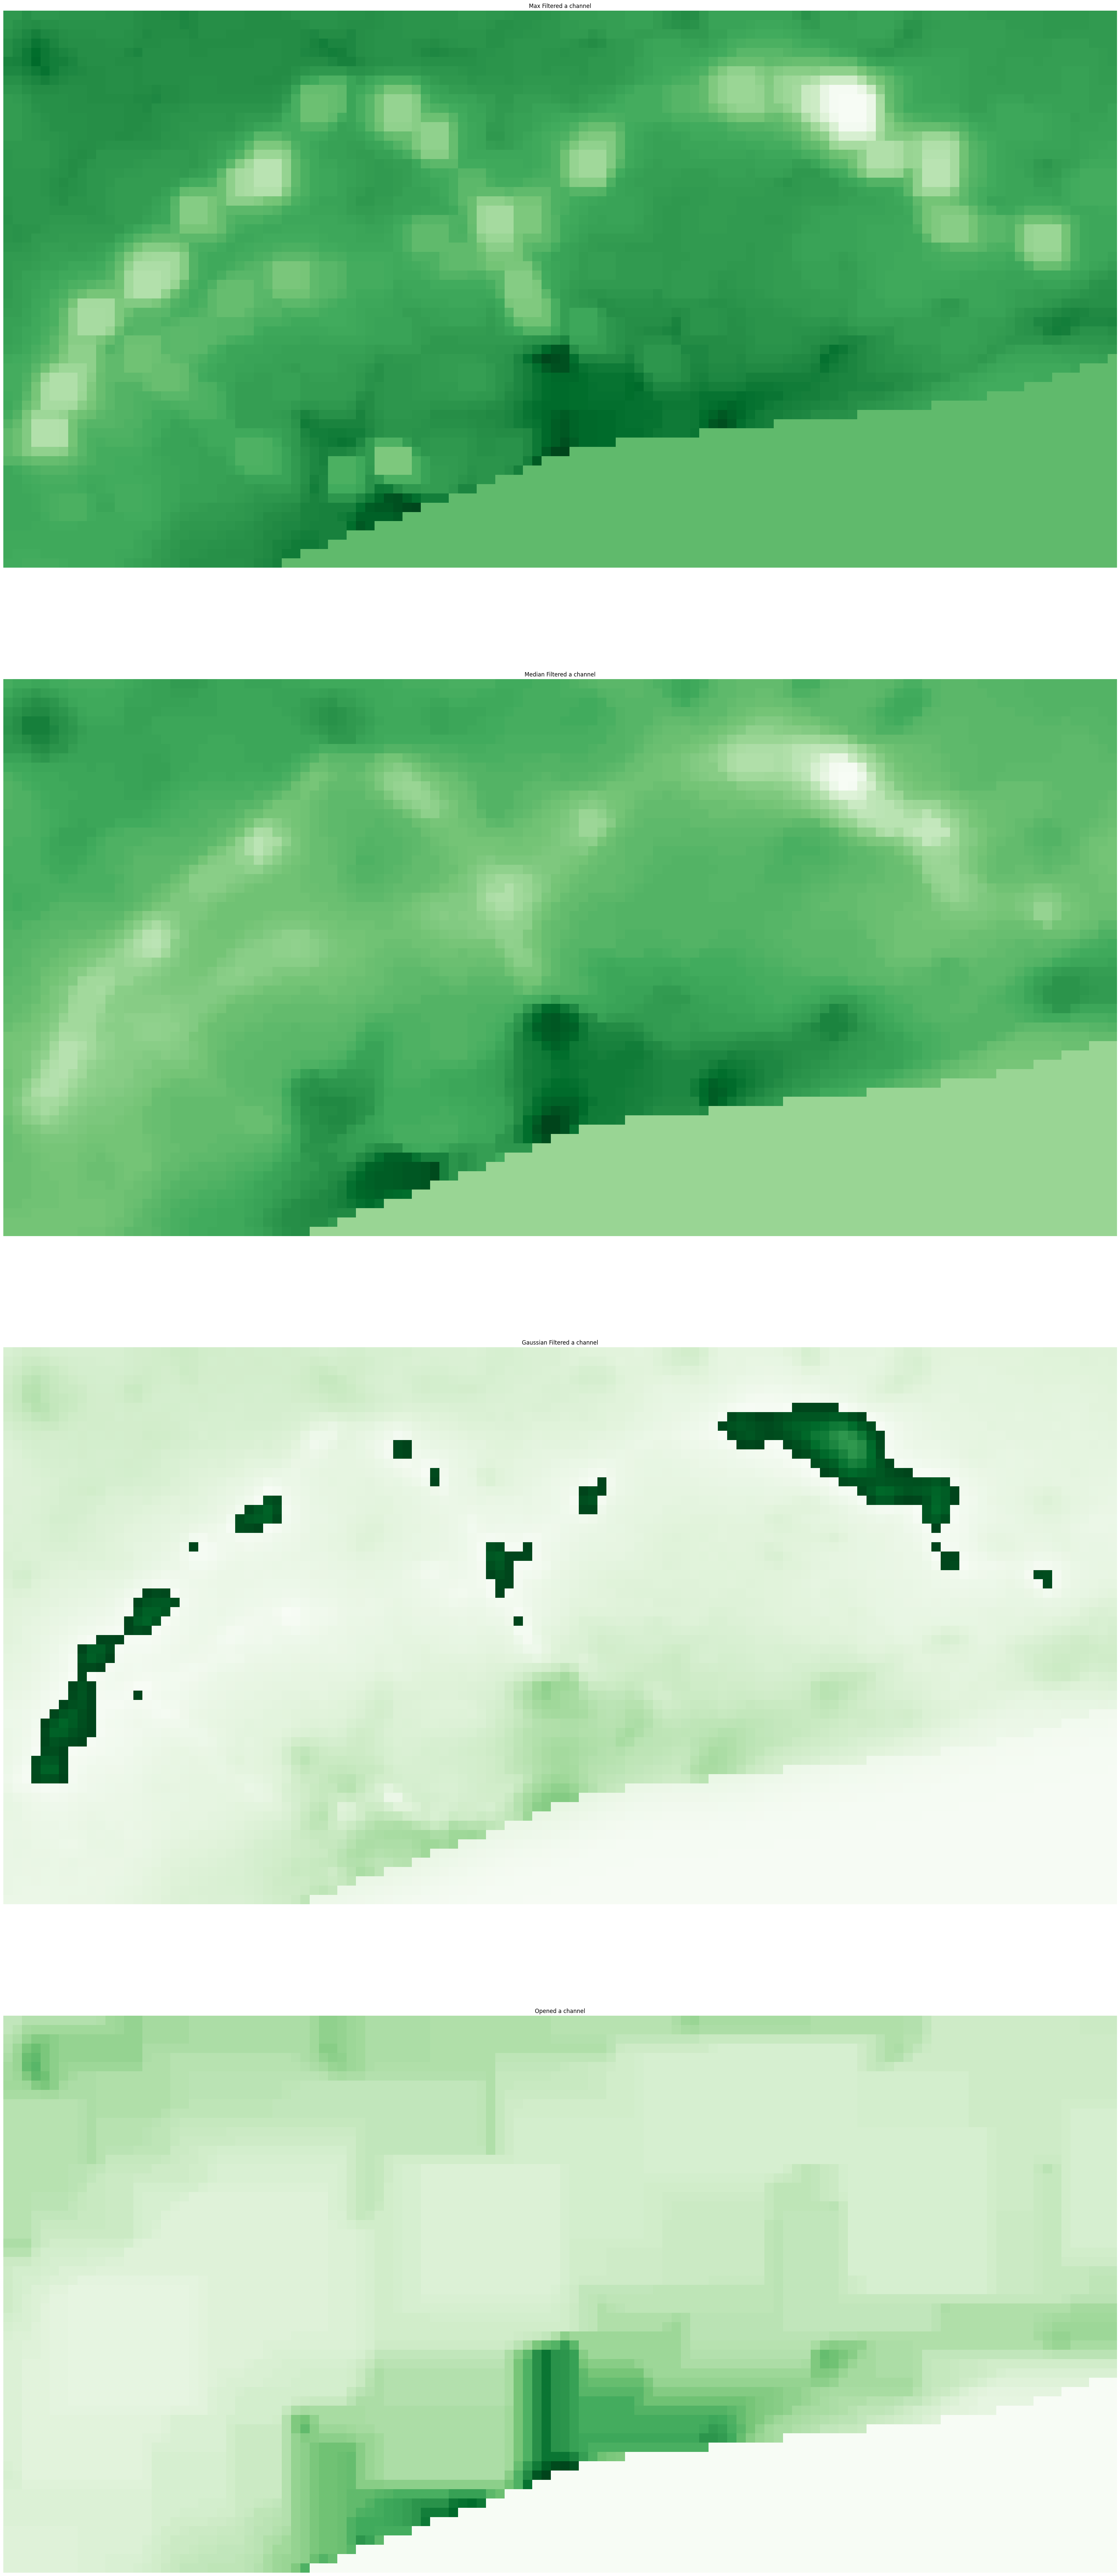

In [51]:
# 套用最大值濾波器
blurred_a_channel_max = cv2.dilate(lab_image[:,:,1], np.ones((3, 3), np.uint8))

# 套用中位數濾波器
blurred_a_channel_median = cv2.medianBlur(lab_image[:,:,1], 5)

# 套用高斯濾波器
blurred_a_channel_gaussian = cv2.GaussianBlur(lab_image[:,:,1], (21, 21), 0)

# 使用開操作去除小的白色區域
import cv2
import numpy as np

# def create_highlight_mask(img):
#     # 轉換為灰階
#     if len(img.shape) == 3:
#         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     else:
#         gray = img
    
#     # 高閾值提取高光區域
#     _, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)  # 調整閾值
    
#     # 形態學閉運算連接鄰近的高光區域
#     kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))  # 調整核大小
#     mask = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    
#     # 填充小洞
#     mask = cv2.morphologyEx(mask, cv2.MORPH_FILL_HOLES, kernel)

#     return mask

kernel = np.ones((13, 13), np.uint8)
opened_a_channel = cv2.morphologyEx(lab_image[:,:,1], cv2.MORPH_OPEN, kernel)



plt.figure(figsize=(100, 100))

plt.subplot(4, 1, 1)
plt.title('Max Filtered a channel')
plt.imshow(blurred_a_channel_max[805:865,865:985], cmap='Greens_r')  # Combined Lab image
plt.axis('off')

plt.subplot(4, 1, 2)
plt.title('Median Filtered a channel')
plt.imshow(blurred_a_channel_median[805:865,865:985], cmap='Greens_r')  # Combined Lab image
plt.axis('off')

plt.subplot(4, 1, 3)
plt.title('Gaussian Filtered a channel')
plt.imshow(lab_image[805:865,865:985,1] + blurred_a_channel_gaussian[805:865,865:985], cmap='Greens_r')  # Combined Lab image
plt.axis('off')

plt.subplot(4, 1, 4)
plt.title('Opened a channel')
plt.imshow(opened_a_channel[805:865,865:985], cmap='Greens_r')  # Combined Lab image
plt.axis('off')

plt.show()

(np.float64(-0.5), np.float64(119.5), np.float64(59.5), np.float64(-0.5))

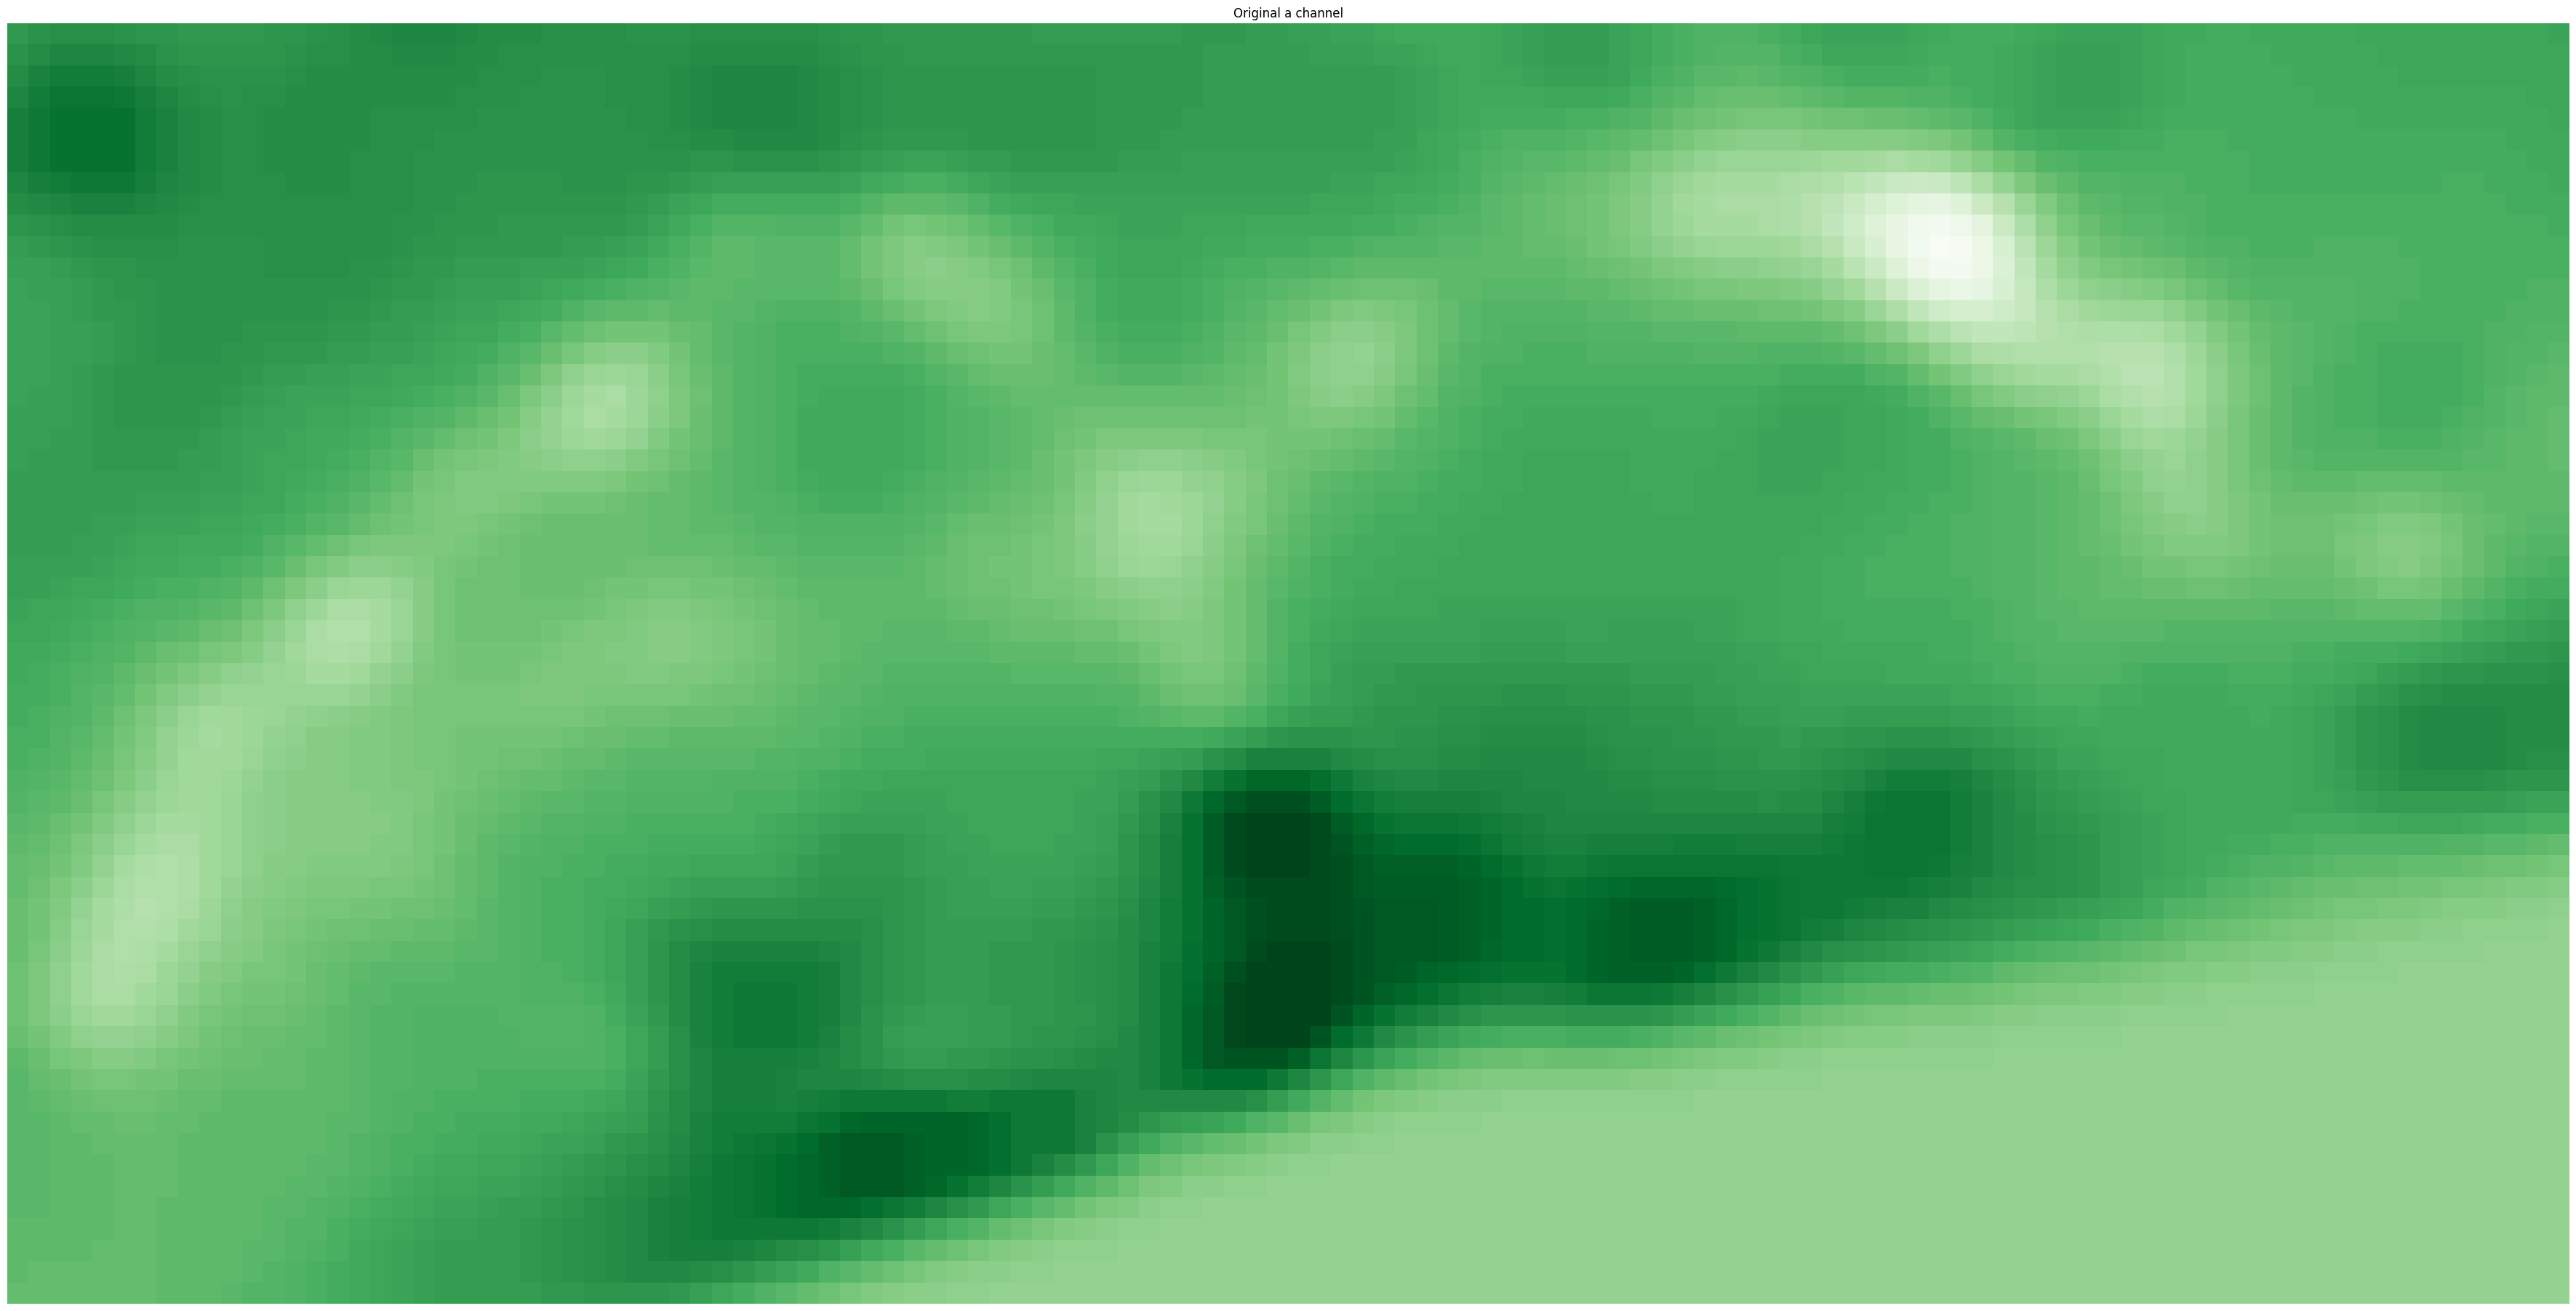

In [ ]:
def apply_filters(input, order:list):
	for filter in order:
		if filter == 'max':
			input = cv2.dilate(input, np.ones((3, 3), np.uint8))
		elif filter == 'min':
			input = cv2.erode(input, np.ones((3, 3), np.uint8))
		elif filter == 'median':
			input = cv2.medianBlur(input, 5)
		elif filter == 'gaussian':
			input = cv2.GaussianBlur(input, (11, 11), 0)
		elif filter == 'open':
			kernel = np.ones((3, 3), np.uint8)
			input = cv2.morphologyEx(input, cv2.MORPH_OPEN, kernel)
		elif filter == 'close':
			kernel = np.ones((3, 3), np.uint8)
			input = cv2.morphologyEx(input, cv2.MORPH_CLOSE, kernel)
		else:
			print(f"Filter {filter} not recognized.")
	return input


filtered_a_channel = apply_filters(lab_image[:,:,1], ['gaussian','close', 'close'])

plt.figure(figsize=(100, 100))
plt.subplot(1, 2, 1)
plt.title('Original a channel')
plt.imshow(filtered_a_channel[805:865,865:985], cmap='Greens_r')  # Combined Lab image
plt.axis('off')